# Student Exam Performance Analysis
Let's start by importing the tools we need.

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

plt.style.use('seaborn-deep')

df = pd.read_csv('StudentsPerformance.csv')

Let's take a look at the data we're using.

In [6]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


As we can see, our data has students from all sorts of education backgrounds. (n=1000)
## Effect of Test Preparation on Grades
### Math Score

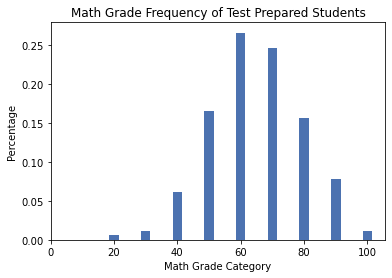

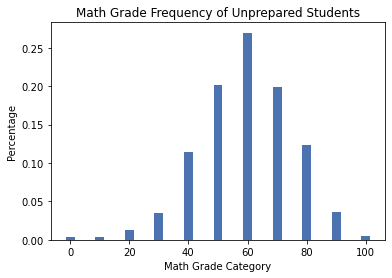

In [7]:
# Divide students into buckets based on their math score
df['math score bucket'] = (df['math score'] // 10) * 10

# Students who took the test preparation course
prepared_students = df[df['test preparation course'] == 'completed']
num_prepared_students = prepared_students.shape[0]
prepared_math_counts = Counter(prepared_students['math score bucket'])

x = []
y = []
for key in prepared_math_counts:
    x.append(key)
    y.append(prepared_math_counts[key] / num_prepared_students)

plt.bar(x, height=y, width=3)
plt.title('Math Grade Frequency of Test Prepared Students')
plt.ylabel('Percentage')
plt.xlabel('Math Grade Category')
plt.xticks([0, 20, 40, 60, 80, 100])
plt.show()

# Students who didn't take the test preparation course
unprepared_students = df[df['test preparation course'] == 'none']
num_unprepared_students = unprepared_students.shape[0]
unprepared_math_counts = Counter(unprepared_students['math score bucket'])
x = []
y = []
for key in unprepared_math_counts:
    x.append(key)
    y.append(unprepared_math_counts[key] / num_unprepared_students)

plt.bar(x, height=y, width=3)
plt.title('Math Grade Frequency of Unprepared Students')
plt.ylabel('Percentage')
plt.xlabel('Math Grade Category')
plt.show()

Each grade has been categorized into a "bucket" corresponding to a range of 9 numbers (ie 68 is plotted under 60, 52 is plotted under 50, etc)

From these bar graphs, we can see that a greater percentage of students who did not take the test preparation course scored grades in the higher ranges than students who did not take the test preparation course.

But it might be better to look at some basic central tendency data first.

In [8]:
print(f"Prepared Students Math Score Mean: {prepared_students['math score'].mean()}")
print(f"Unprepared Students Math Score Mean: {unprepared_students['math score'].mean()}")

Prepared Students Math Score Mean: 69.69553072625699
Unprepared Students Math Score Mean: 64.0778816199377
